### **1. Project Objective and Dataset Overview**
**Team Members**: 
- Kemel Merey
- Kuanyshbek Ulpan
- Zholdybay Altynbek

#### **Problem Definition**

The objective of this project is to predict an individual's obesity category based on their personal habits and demographic information.

*   **Target Variable:** `NObeyesdad`
*   **Problem Type:** Multi-Class Classification

#### **Project Goal**

- The goal is to build a model that can identify a person's risk of obesity. 

### Sources
This dataset include data for the estimation of obesity levels in individuals from the countries of **Mexico**, **Peru** and **Colombia**, based on their eating habits and physical condition.\
[Estimation of Obesity Levels Based On Eating Habits and Physical Condition](https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition)

# 1. Data Loading and Initial Exploration

In this section, we will load the dataset and perform an initial inspection to understand its structure.

### 1.1 Import Libraries
We begin by importing the necessary Python libraries for data manipulation and visualization.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
custom_colors = ["#9AC9B6", "#F6F7E1", "#EBA05C", "#CB7843", "#7D4E3E"]
sns.set_style("whitegrid")
sns.set_palette(custom_colors)
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.titleweight'] = 'bold'

### 1.2 Load Dataset
We load the `ObesityDataSet_raw_and_data_sinthetic.csv` file into a pandas DataFrame.

In [12]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [13]:
df.tail()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III
2110,Female,23.664709,1.738836,133.472641,yes,yes,3.0,3.0,Sometimes,no,2.863513,no,1.026452,0.714137,Sometimes,Public_Transportation,Obesity_Type_III


### 1.3 Initial Data Inspection
We examine the dataset's dimensions, data types, and check for missing values. We also generate descriptive statistics to get a sense of the data ranges and central tendencies.

In [14]:
# Check dataset size and data types
print("--- Data Info ---")
df.info()

# Check for duplicates
print(f"\nNumber of duplicate rows: {df.duplicated().sum()}")


--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF             

In [15]:
# Statistical summary of numerical columns
print("\n--- Descriptive Statistics ---")
df.describe()


--- Descriptive Statistics ---


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### 1.4 Column Renaming
To improve code readability and interpretation throughout the project, we will rename the cryptic column headers (e.g., `FAVC`, `FCVC`) to descriptive English names based on the dataset documentation.

In [16]:
# Dictionary mapping old names to new descriptive names
column_mapping = {
    'family_history_with_overweight': 'FamilyHistory',
    'FAVC': 'HighCaloricFood',
    'FCVC': 'VegetableConsumption',
    'NCP': 'MainMeals',
    'CAEC': 'FoodBetweenMeals',
    'SMOKE': 'Smoke',
    'CH2O': 'WaterConsumption',
    'SCC': 'CalorieMonitoring',
    'FAF': 'PhysicalActivityFreq',
    'TUE': 'TechUseTime',
    'CALC': 'AlcoholConsumption',
    'MTRANS': 'Transportation',
    'NObeyesdad': 'ObesityLevel'
}

# Apply renaming
df.rename(columns=column_mapping, inplace=True)

# Verify changes
print(df.columns)
df.head(2)

Index(['Gender', 'Age', 'Height', 'Weight', 'FamilyHistory', 'HighCaloricFood',
       'VegetableConsumption', 'MainMeals', 'FoodBetweenMeals', 'Smoke',
       'WaterConsumption', 'CalorieMonitoring', 'PhysicalActivityFreq',
       'TechUseTime', 'AlcoholConsumption', 'Transportation', 'ObesityLevel'],
      dtype='object')


,Gender,Age,Height,Weight,FamilyHistory,HighCaloricFood,VegetableConsumption,MainMeals,FoodBetweenMeals,Smoke,WaterConsumption,CalorieMonitoring,PhysicalActivityFreq,TechUseTime,AlcoholConsumption,Transportation,ObesityLevel
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight


### 1.5 Observations from Initial Inspection

Based on the output above, we have identified several key characteristics of the dataset:

1.  **Data Structure**: The dataset contains **2111 rows** and **17 columns**. There are **no missing values** (non-null count is 2111 for all columns), which significantly simplifies cleaning.
2.  **Duplicate Data**: We found **24 duplicate rows**. These should be removed to prevent data leakage between train and test sets and to ensure the model generalizes well.
3.  **Data Types & Synthetic Nature**:
    *   Columns like `Age`, `VegetableConsumption` (FCVC), and `MainMeals` (NCP) are stored as `float64`.
    *   Looking at the `tail()` of the dataframe, we see decimal values (e.g., Age `20.98`, WaterConsumption `1.73`). This confirms that a portion of this dataset was generated synthetically (likely using SMOTE or a similar oversampling technique), resulting in continuous values for variables that would typically be integers. We may need to round these during preprocessing.
4.  **Target Variable**: `ObesityLevel` is categorical (object type), confirming this is a classification problem.

# 2. Deep Exploratory Data Analysis (EDA)

Our analysis proceeds in four stages:
1.  **Univariate Analysis:** Examining distributions and detecting outliers.
2.  **Bivariate Analysis (Numerical):** Correlations and the critical investigation of data leakage.
3.  **Bivariate Analysis (Categorical):** Investigating how lifestyle habits impact obesity.
4.  **Multivariate Analysis:** Exploring complex interactions (e.g., Age cohorts).

## 2.1 Data Integrity: Handling Duplicates
The initial inspection revealed 24 duplicate rows. We remove them now to prevent data leakage and bias in our statistical analysis.

In [17]:
# Check shape before
print(f"Original shape: {df.shape}")

# Drop duplicates
df.drop_duplicates(inplace=True)

# Check shape after
print(f"Shape after dropping duplicates: {df.shape}")

Original shape: (2111, 17)
Shape after dropping duplicates: (2087, 17)


## 2.2 Target Variable Analysis (`ObesityLevel`)
We examine the class balance. In medical datasets, the "normal" class is often overrepresented. However, since this dataset includes synthetic data, we might see a balanced distribution.
*   **Goal:** Determine if we need re-sampling techniques (SMOTE) later.

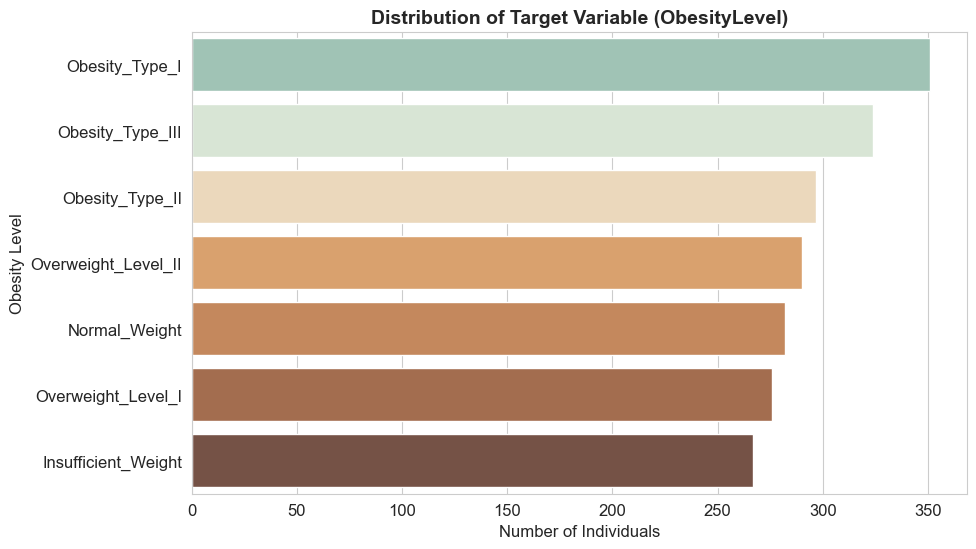

ObesityLevel
Obesity_Type_I         0.168184
Obesity_Type_III       0.155247
Obesity_Type_II        0.142310
Overweight_Level_II    0.138955
Normal_Weight          0.135122
Overweight_Level_I     0.132247
Insufficient_Weight    0.127935
Name: proportion, dtype: float64


In [18]:
plt.figure(figsize=(10, 6))
counts = df['ObesityLevel'].value_counts().sort_values(ascending=False)

dynamic_palette = sns.blend_palette(custom_colors, n_colors=len(counts))

sns.barplot(x=counts.values, y=counts.index, hue=counts.index, palette=dynamic_palette, legend=False)
plt.title('Distribution of Target Variable (ObesityLevel)')
plt.xlabel('Number of Individuals')
plt.ylabel('Obesity Level')

plt.show()

print(df['ObesityLevel'].value_counts(normalize=True))

## 2.3 Numerical Feature Distributions
We analyze the shape of numerical features.
*   **Skewness:** Are `Age` or `Weight` skewed? (Right-skewed data might need Log Transformation).
*   **Modality:** Do variables like `PhysicalActivityFreq` show distinct clusters?

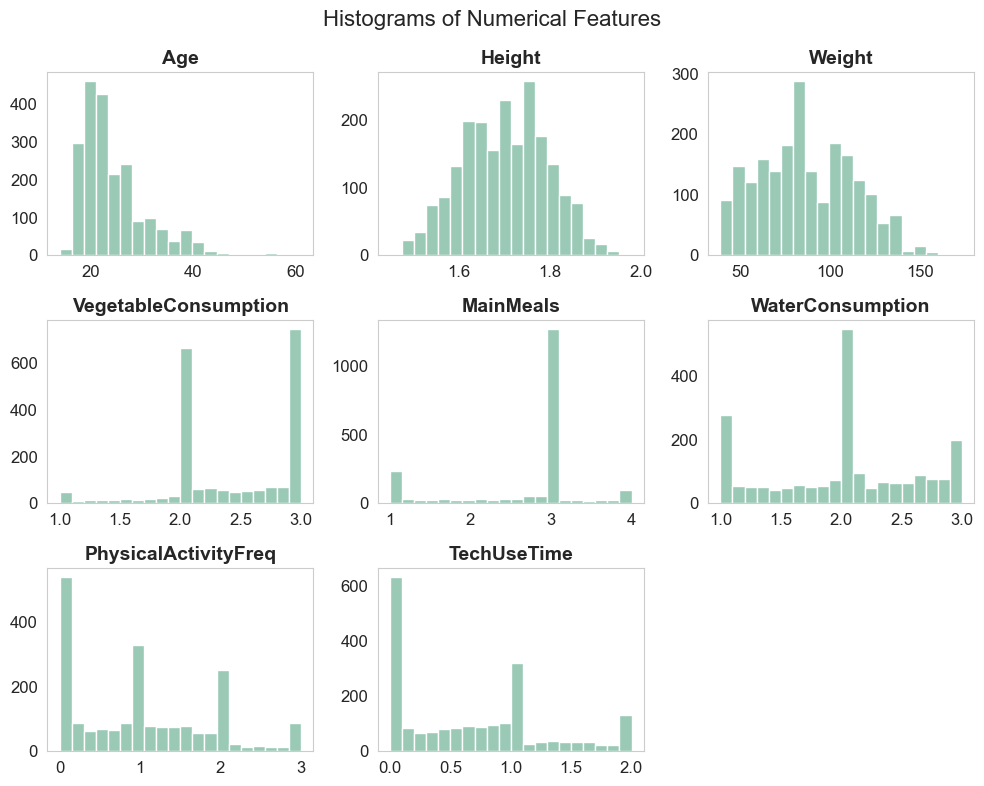

In [19]:
num_cols = ['Age', 'Height', 'Weight', 'VegetableConsumption', 'MainMeals', 'WaterConsumption', 'PhysicalActivityFreq', 'TechUseTime']

df[num_cols].hist(bins=20, figsize=(10, 8), layout=(3, 3), color=custom_colors[0], grid=False)
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

## 2.4 Outlier Analysis (Boxplots)
We use boxplots to identify anomalies.
*   **Deep Insight:** In synthetic data, outliers might not be "errors" but rather specific edge cases generated by the SMOTE algorithm. We need to verify if the outliers in `Age` or `Weight` are biologically possible or data errors.

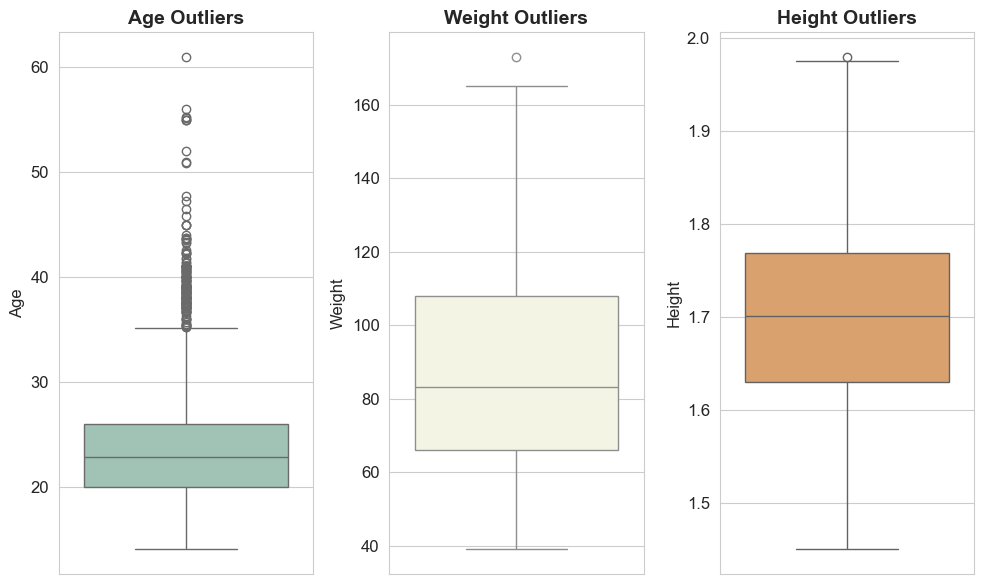

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(10, 6))

# Age Boxplot
sns.boxplot(y='Age', data=df, ax=axes[0], color=custom_colors[0])
axes[0].set_title('Age Outliers')

# Weight Boxplot
sns.boxplot(y='Weight', data=df, ax=axes[1], color=custom_colors[1])
axes[1].set_title('Weight Outliers')

# Height Boxplot
sns.boxplot(y='Height', data=df, ax=axes[2], color=custom_colors[2])
axes[2].set_title('Height Outliers')

plt.tight_layout()
plt.show()

## 2.5 Categorical Feature Analysis
We examine the distribution of categorical variables to understand the demographics and lifestyle habits of our population.
*   **Demographics:** `Gender` balance.
*   **Habits:** `Smoke`, `FamilyHistory`, `HighCaloricFood`.
*   **Imbalance Check:** Are any categories (e.g., Smokers) extremely rare? This could make it hard for the model to learn their effect.

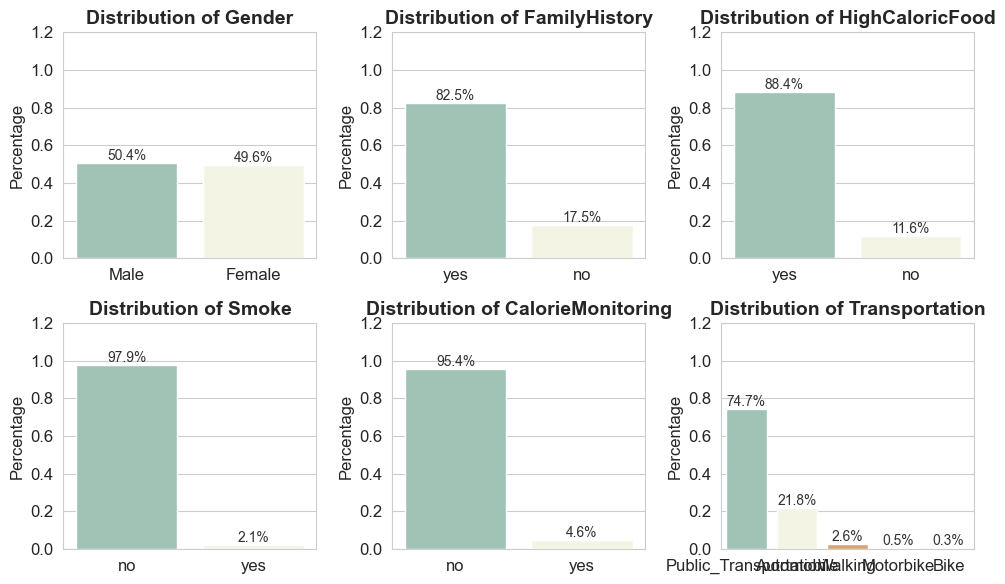

In [21]:
cat_cols = ['Gender', 'FamilyHistory', 'HighCaloricFood', 'Smoke', 'CalorieMonitoring', 'Transportation']

fig, axes = plt.subplots(2, 3, figsize=(10, 6))
axes = axes.flatten()

for i, col in enumerate(cat_cols):
    counts = df[col].value_counts(normalize=True)
    
    sns.barplot(x=counts.index, y=counts.values, ax=axes[i], hue=counts.index, palette=custom_colors, legend=False)
    
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Percentage')
    axes[i].set_xlabel('')
    axes[i].set_ylim(0, 1.2)
    
    for p in axes[i].patches:
        axes[i].annotate(f'{p.get_height()*100:.1f}%', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='bottom', fontsize=10, color='#333333')

plt.tight_layout()
plt.show()

## 2.6 Ordinal Categorical Analysis
Features like `FoodBetweenMeals` (CAEC) and `AlcoholConsumption` (CALC) have an inherent order (No < Sometimes < Frequently < Always). Visualizing these helps us decide if we should encode them as integers (0, 1, 2, 3) or One-Hot vectors.

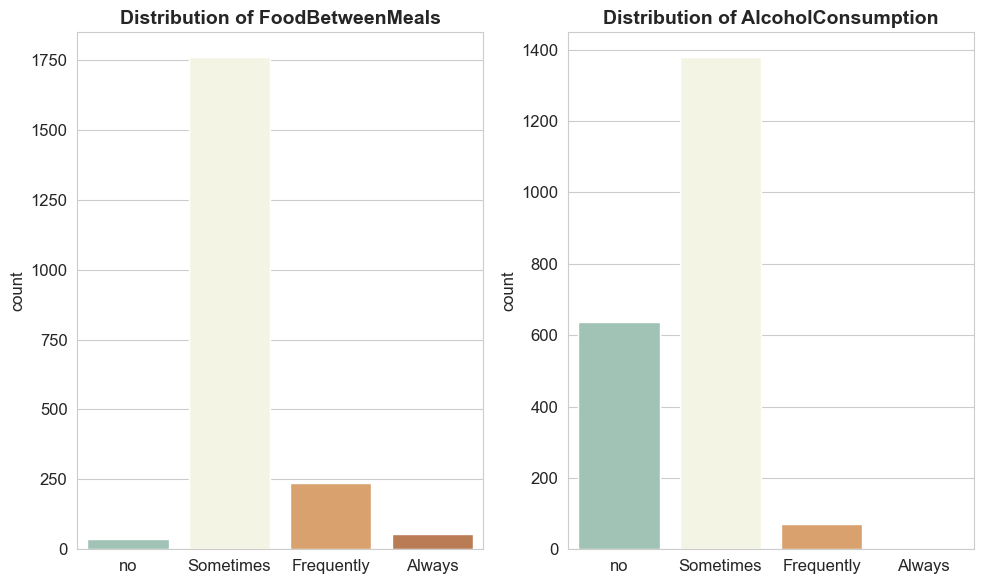

In [22]:
ordinal_cols = ['FoodBetweenMeals', 'AlcoholConsumption']
order_list = ['no', 'Sometimes', 'Frequently', 'Always']

fig, axes = plt.subplots(1, 2, figsize=(10, 6))

for i, col in enumerate(ordinal_cols):
    sns.countplot(x=col, data=df, order=order_list, ax=axes[i], palette=custom_colors)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')

plt.tight_layout()
plt.show()

# 3. Bivariate Analysis: What Drives Obesity?

Having understood the individual variables, we now investigate their relationship with `ObesityLevel`.
*   **Goal:** Identify which lifestyle habits (eating, exercise, transportation) strongly differentiate between Normal Weight and Obesity.

## 3.1 Categorical Lifestyle Factors vs. Obesity
We use stacked bar charts to see how the proportion of obesity levels changes across different groups.
*   **Hypothesis:** `HighCaloricFood` and `FamilyHistory` should show strong correlations with higher obesity levels.

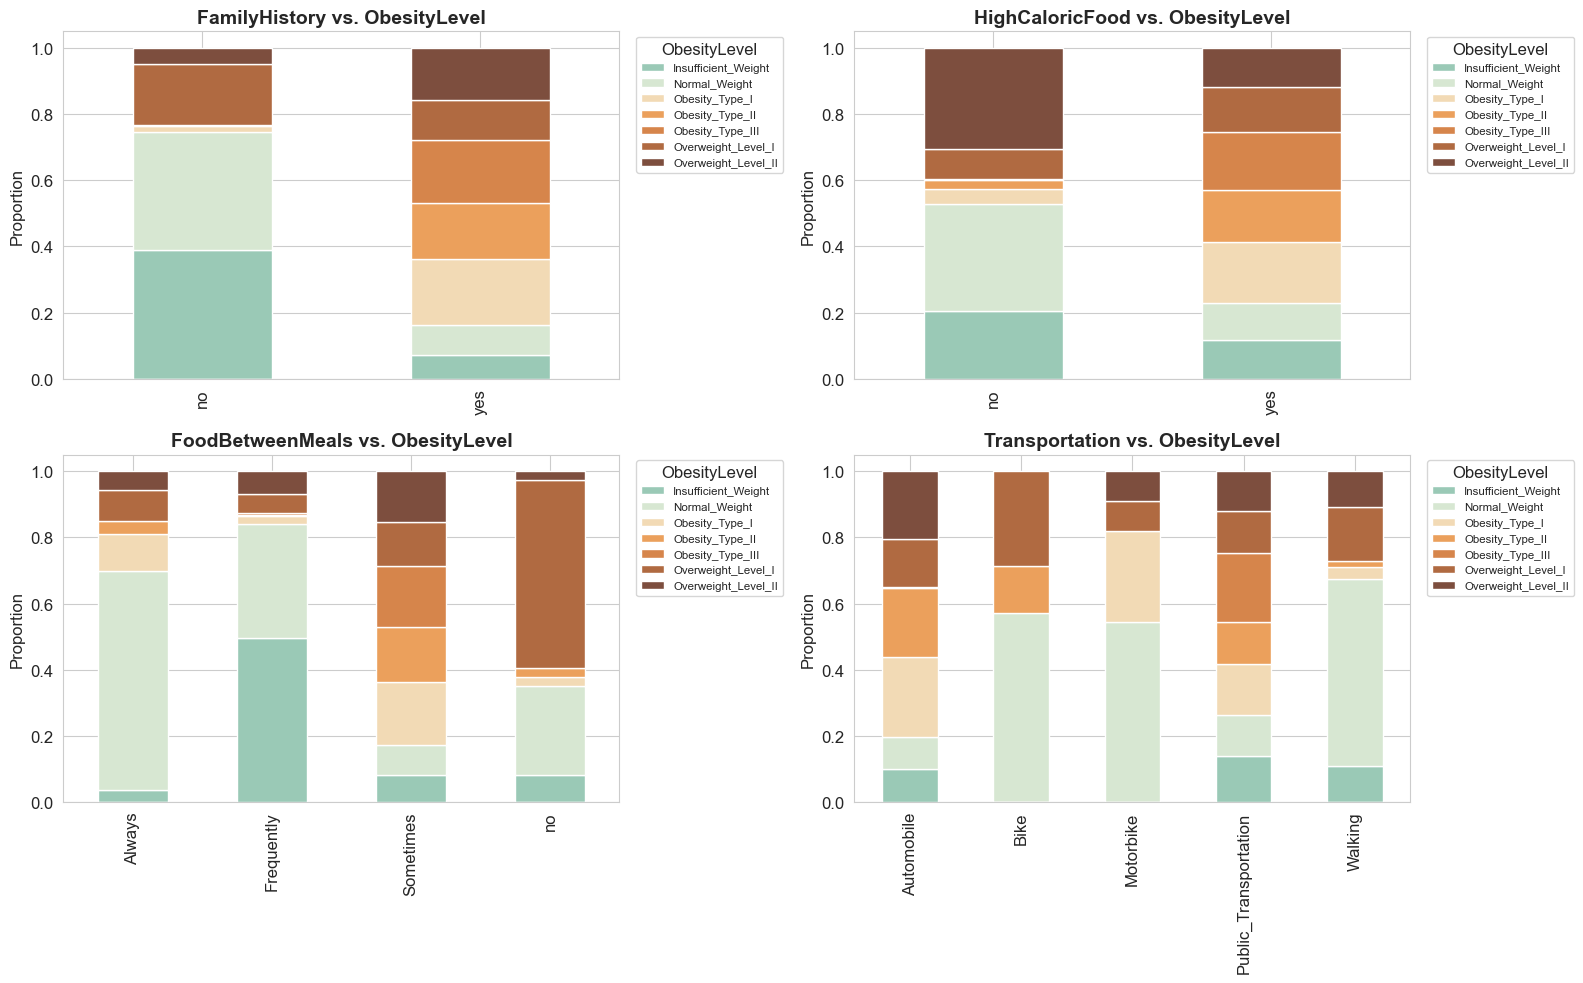

In [23]:
categorical_features = ['FamilyHistory', 'HighCaloricFood', 'FoodBetweenMeals', 'Transportation']
target = 'ObesityLevel'

n_targets = df[target].nunique()
target_palette = sns.blend_palette(custom_colors, n_colors=n_targets)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
axes = axes.flatten() 

for i, col in enumerate(categorical_features):
    props = df.groupby(col)[target].value_counts(normalize=True).unstack()

    props.plot(kind='bar', stacked=True, color=target_palette, ax=axes[i], edgecolor='white')

    axes[i].set_title(f'{col} vs. {target}')
    axes[i].set_ylabel('Proportion')
    axes[i].set_xlabel('')

    axes[i].legend(title=target, bbox_to_anchor=(1.02, 1), loc='upper left', fontsize='x-small')

plt.tight_layout()
plt.show()

## 3.2 Numerical Habits vs. Obesity
We use Boxplots (or Violin plots) to visualize the distribution of numerical habits across obesity levels.
*   **Key Question:** Do people with `Normal_Weight` actually exercise (`PhysicalActivityFreq`) more than those with `Obesity_Type_III`?
*   **Note:** We sort the x-axis by obesity severity to make the trend visible.

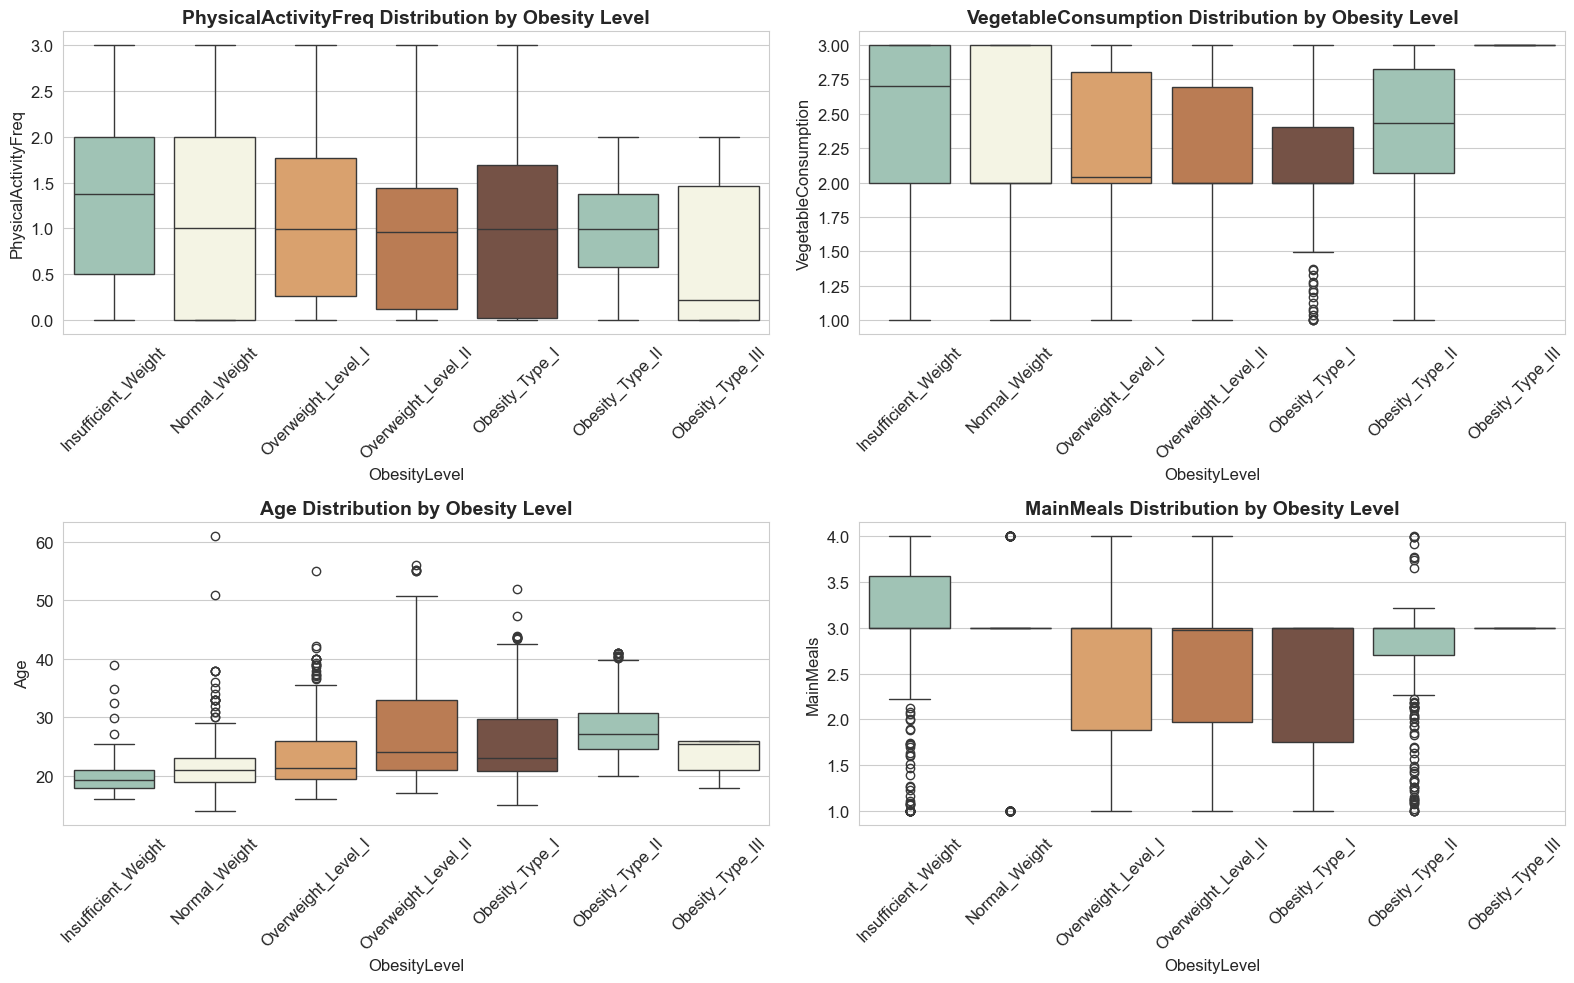

In [24]:
# Define the order of obesity levels for logical plotting
obesity_order = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II', 
                 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III']

# Numerical features to analyze
num_features = ['PhysicalActivityFreq', 'VegetableConsumption', 'Age', 'MainMeals']

fig, axes = plt.subplots(2, 2, figsize=(16, 10))
axes = axes.flatten()

for i, col in enumerate(num_features):
    sns.boxplot(x='ObesityLevel', y=col, data=df, order=obesity_order, ax=axes[i], palette=custom_colors)
    axes[i].set_title(f'{col} Distribution by Obesity Level')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 3.3 Correlation Matrix (Heat Map)
Standard correlation only works on numbers. To find relationships between categorical variables (like `FamilyHistory` or `Transportation`) and Obesity, we apply temporary **Label Encoding**.
*   **Goal:** Identify strong non-numerical drivers of obesity (e.g., does `Transportation` correlate with `Weight`?).

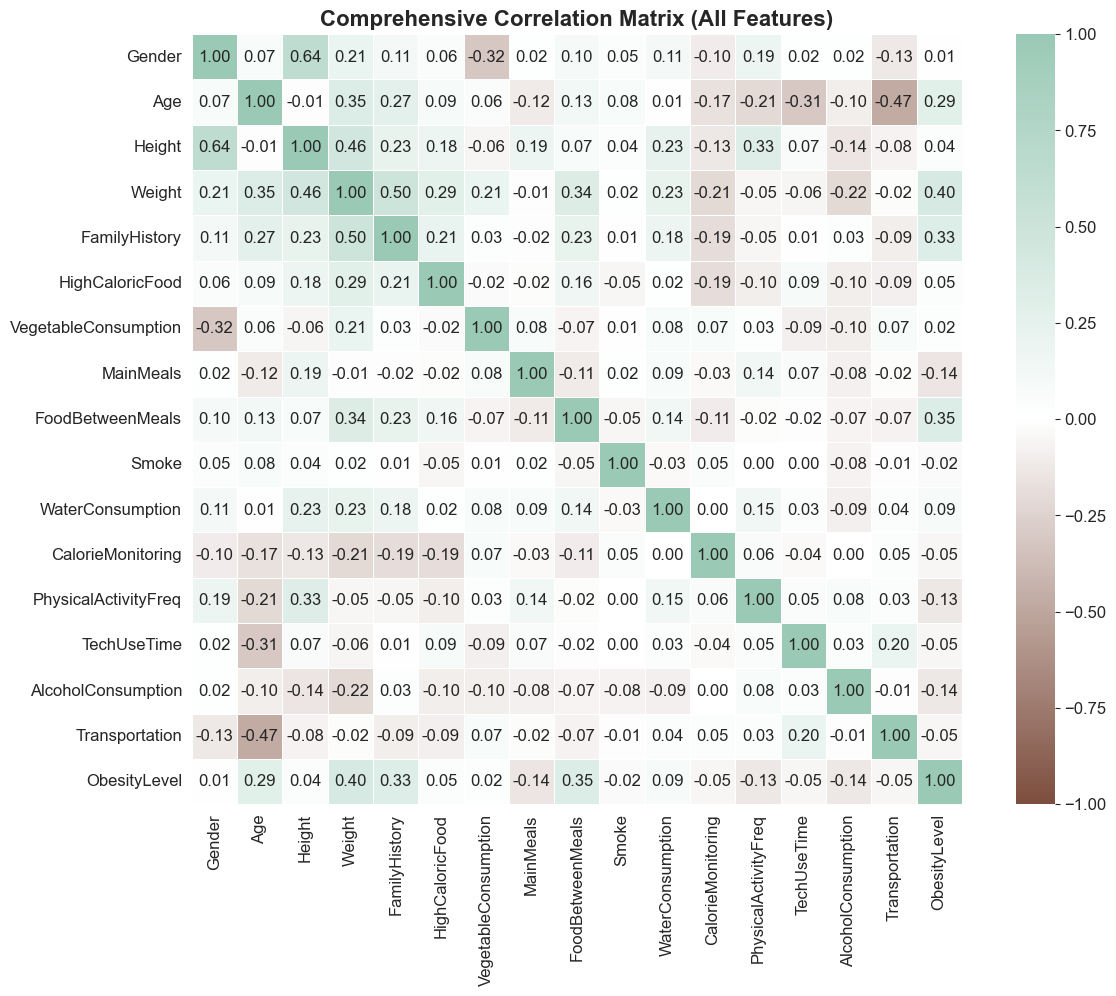

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# --- Define Colors (If not already defined) ---
if 'custom_colors' not in locals():
    custom_colors = ["#8FBC8F", "#F4A460", "#CD853F", "#A0522D", "#8B4513"]

# --- Prepare Data ---
df_corr = df.copy()
le = LabelEncoder()

# Encode categorical columns just for this visualization
for col in df_corr.select_dtypes(include='object').columns:
    df_corr[col] = le.fit_transform(df_corr[col])

# --- Create Custom Colormap ---
# Dark Brown (Neg) -> White (Zero) -> Sage Green (Pos)
earthy_diverging = sns.blend_palette([custom_colors[4], "#FFFFFF", custom_colors[0]], as_cmap=True)

# --- Plot ---
plt.figure(figsize=(14, 10)) # Slightly larger for readability

sns.heatmap(df_corr.corr(method='spearman'), 
            annot=True, 
            fmt='.2f', 
            cmap=earthy_diverging, 
            center=0,        # Centers the white color at 0
            vmin=-1, vmax=1, # Fixes the scale from -1 to 1
            linewidths=0.5, 
            linecolor='white',
            square=True)     # Keeps cells square-shaped

plt.title('Comprehensive Correlation Matrix (All Features)', fontsize=16)
plt.show()

## 3.4 Pairwise Feature Relationships
We use pair plots to visualize how distinct the `ObesityLevel` classes are in multi-dimensional space.
*   **Focus:** We look for clusters. If classes overlap significantly in these plots, simple linear models will fail, justifying our need for complex models (Random Forest/XGBoost) later.

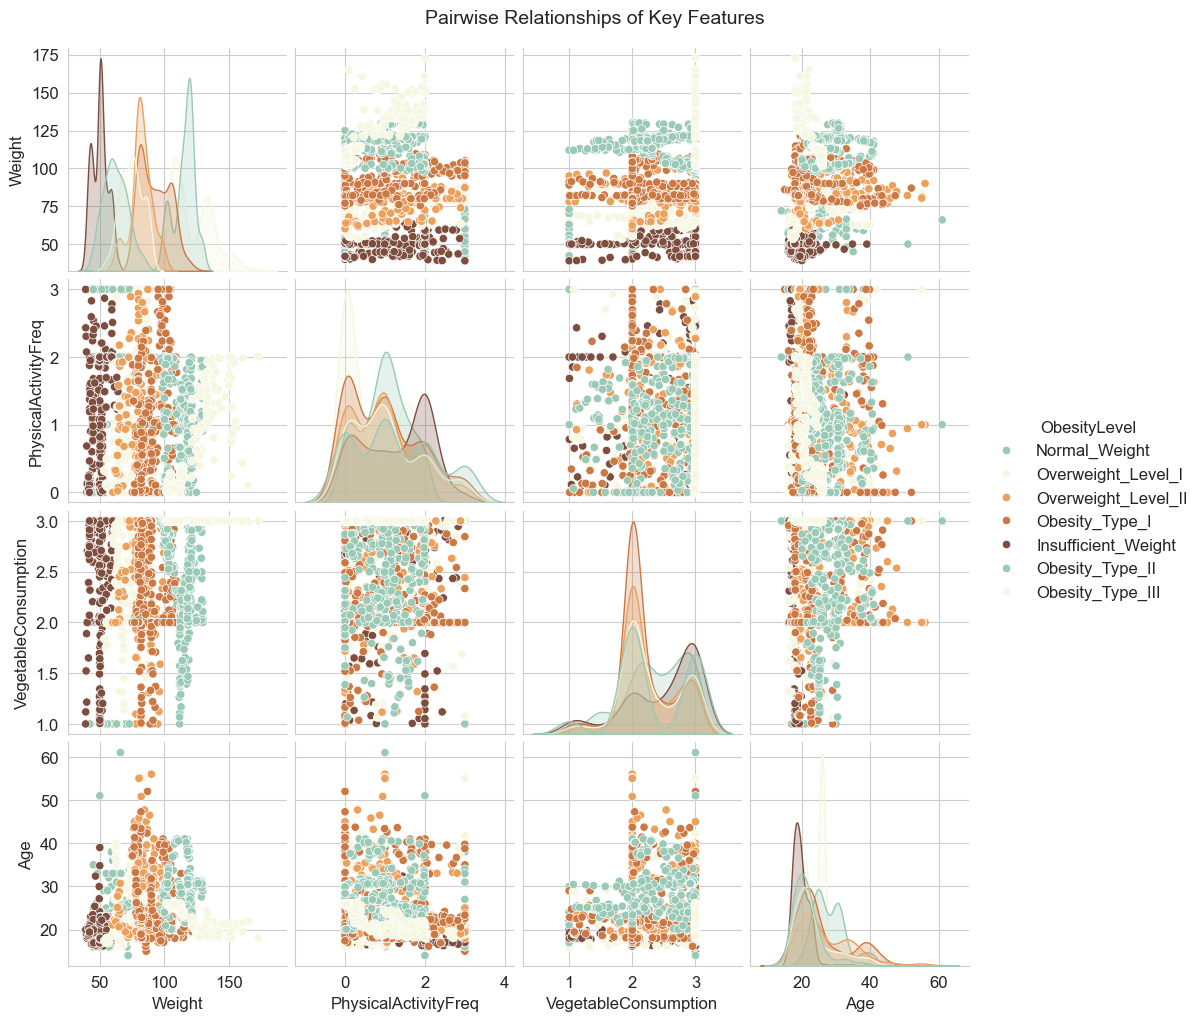

In [26]:
# Select the most distinct features to keep the plot readable
selected_features = ['Weight', 'PhysicalActivityFreq', 'VegetableConsumption', 'Age', 'ObesityLevel']

sns.pairplot(df[selected_features], hue='ObesityLevel', palette=custom_colors )
plt.suptitle('Pairwise Relationships of Key Features', y=1.02, fontsize=14)
plt.show()

## 3.5 Segmentation Analysis: Age Groups
Obesity drivers likely differ between a 19-year-old student and a 50-year-old adult. We bin `Age` into groups to analyze these distinct cohorts.
*   **Feature Engineering Idea:** This analysis justifies creating an `AgeGroup` feature in the next step.

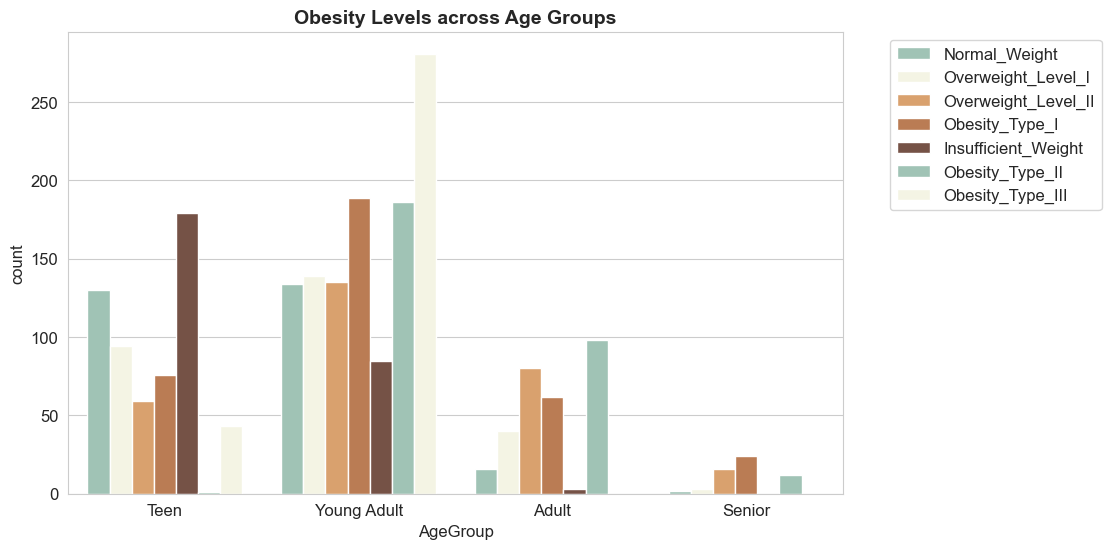

In [27]:
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 20, 30, 40, 100], labels=['Teen', 'Young Adult', 'Adult', 'Senior'])

plt.figure(figsize=(10, 6))
sns.countplot(x='AgeGroup', hue='ObesityLevel', data=df, palette=custom_colors)
plt.title('Obesity Levels across Age Groups', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

df.drop(columns=['AgeGroup'], inplace=True)

## 3.6 Non-Linear Feature Utility (Mutual Information)
The correlation matrix showed weak linear correlations for habits like `VegetableConsumption`. However, relationships in behavioral data are often non-linear.

We calculate **Mutual Information (MI)** scores. unlike correlation, MI captures *any* kind of relationship between the feature and the target.
*   **High MI:** The feature strongly reduces uncertainty about the Obesity Level.
*   **Low MI:** The feature is likely irrelevant.

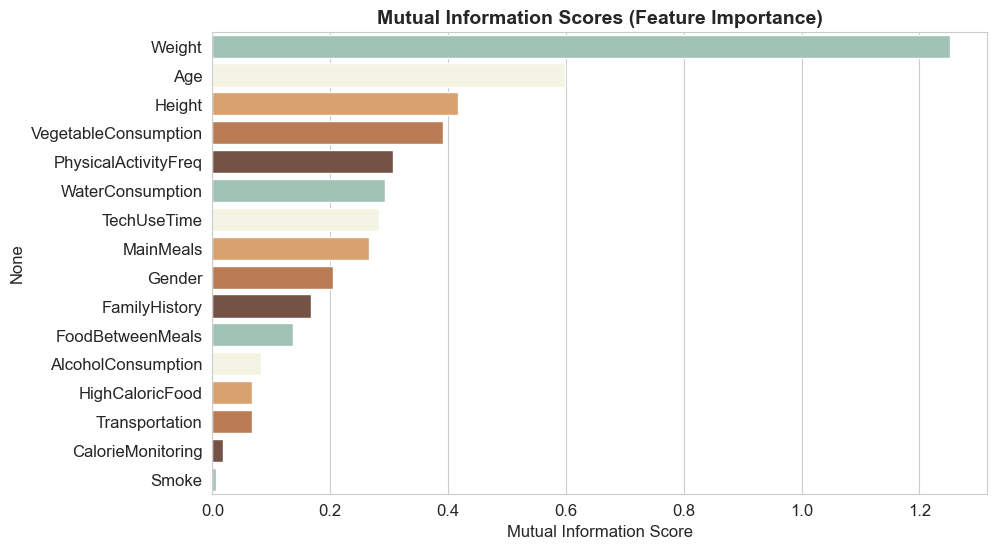

In [28]:
from sklearn.feature_selection import mutual_info_classif

X_mi = df.drop(columns=['ObesityLevel'])
y_mi = df['ObesityLevel']

for col in X_mi.select_dtypes(include='object').columns:
    X_mi[col] = X_mi[col].astype('category').cat.codes

mi_scores = mutual_info_classif(X_mi, y_mi, discrete_features='auto', random_state=42)
mi_series = pd.Series(mi_scores, index=X_mi.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=mi_series.values, y=mi_series.index, palette=custom_colors)
plt.title('Mutual Information Scores (Feature Importance)', fontsize=14)
plt.xlabel('Mutual Information Score')
plt.show()

## 3.7 Visualizing Class Separability (PCA & t-SNE)
We want to verify our "Behavioral Model" hypothesis. Can we separate the obesity classes using **only** lifestyle and demographic features (ignoring Weight and Height)?

We use **t-SNE (t-Distributed Stochastic Neighbor Embedding)**, a powerful technique for visualizing high-dimensional data in 2D.
*   **Hypothesis:** If distinct clusters form without Weight/Height, our behavioral model has a high chance of success. If the plot is a messy "cloud," the model will struggle.

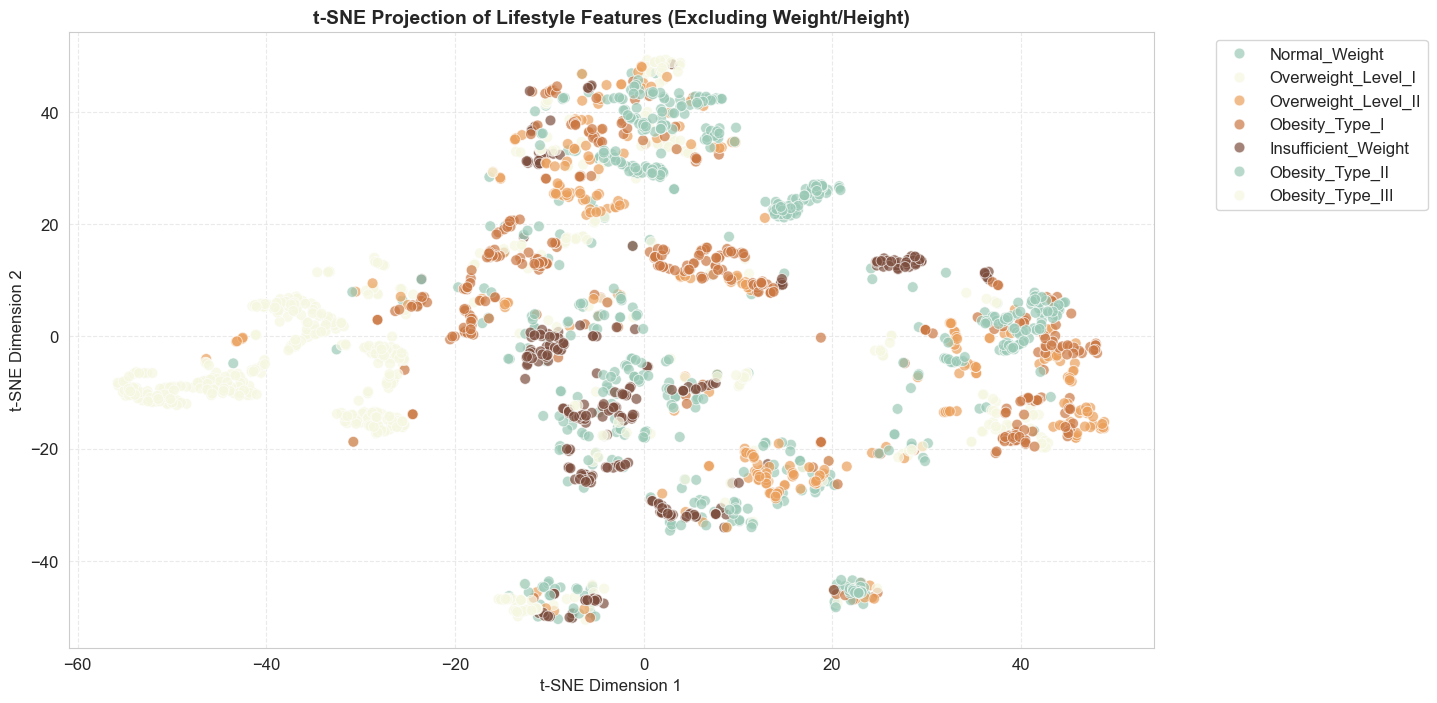

In [29]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

features_for_tsne = df.drop(columns=['ObesityLevel', 'Weight', 'Height'])

for col in features_for_tsne.select_dtypes(include='object').columns:
    features_for_tsne[col] = features_for_tsne[col].astype('category').cat.codes

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features_for_tsne)

tsne = TSNE(n_components=2, random_state=42, perplexity=40)
X_tsne = tsne.fit_transform(X_scaled)

plt.figure(figsize=(14, 8))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['ObesityLevel'], palette=custom_colors, alpha=0.7, s=60)
plt.title('t-SNE Projection of Lifestyle Features (Excluding Weight/Height)', fontsize=14)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()

## 3.8 Lifestyle Clustering (Persona Analysis)
Before moving to supervised learning, let's see if there are natural "Lifestyle Personas" in the dataset.
We compare the "Healthy" habits vs. "Unhealthy" habits using a bivariate plot.

*   **Axis X:** `PhysicalActivityFreq` (Exercise)
*   **Axis Y:** `VegetableConsumption` (Diet)
*   **Hue:** `ObesityLevel`

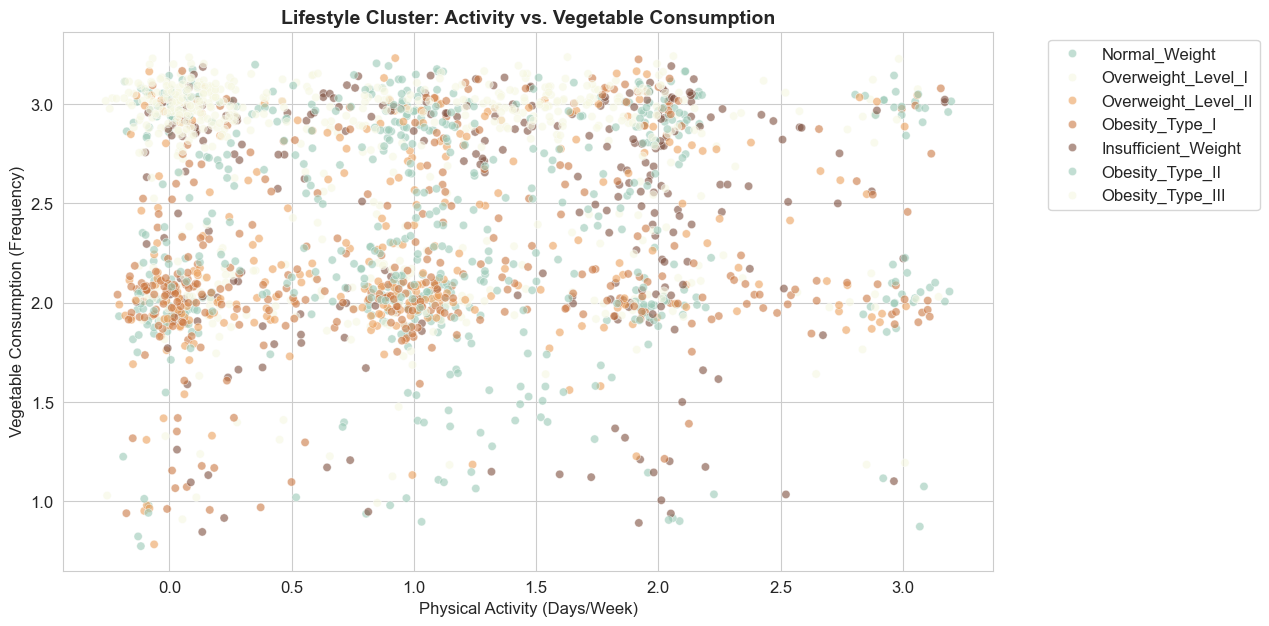

In [30]:
plt.figure(figsize=(12, 7))

# Jittering the points slightly so they don't overlap perfectly (since the data is discrete)
jitter_x = df['PhysicalActivityFreq'] + np.random.normal(0, 0.1, size=len(df))
jitter_y = df['VegetableConsumption'] + np.random.normal(0, 0.1, size=len(df))

sns.scatterplot(x=jitter_x, y=jitter_y, hue=df['ObesityLevel'], palette=custom_colors, alpha=0.6)
plt.title('Lifestyle Cluster: Activity vs. Vegetable Consumption', fontsize=14)
plt.xlabel('Physical Activity (Days/Week)')
plt.ylabel('Vegetable Consumption (Frequency)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# 4. Preprocessing & Feature Engineering

Based on our EDA findings, we will now prepare the data for modeling.
*   **Action 1:** Address Data Leakage by removing `Weight` and `Height`.
*   **Action 2:** Clean synthetic artifacts (rounding float values).
*   **Action 3:** Engineer new features to capture complex behavioral patterns.

Columns remaining: ['Gender', 'Age', 'FamilyHistory', 'HighCaloricFood', 'VegetableConsumption', 'MainMeals', 'FoodBetweenMeals', 'Smoke', 'WaterConsumption', 'CalorieMonitoring', 'PhysicalActivityFreq', 'TechUseTime', 'AlcoholConsumption', 'Transportation', 'ObesityLevel']


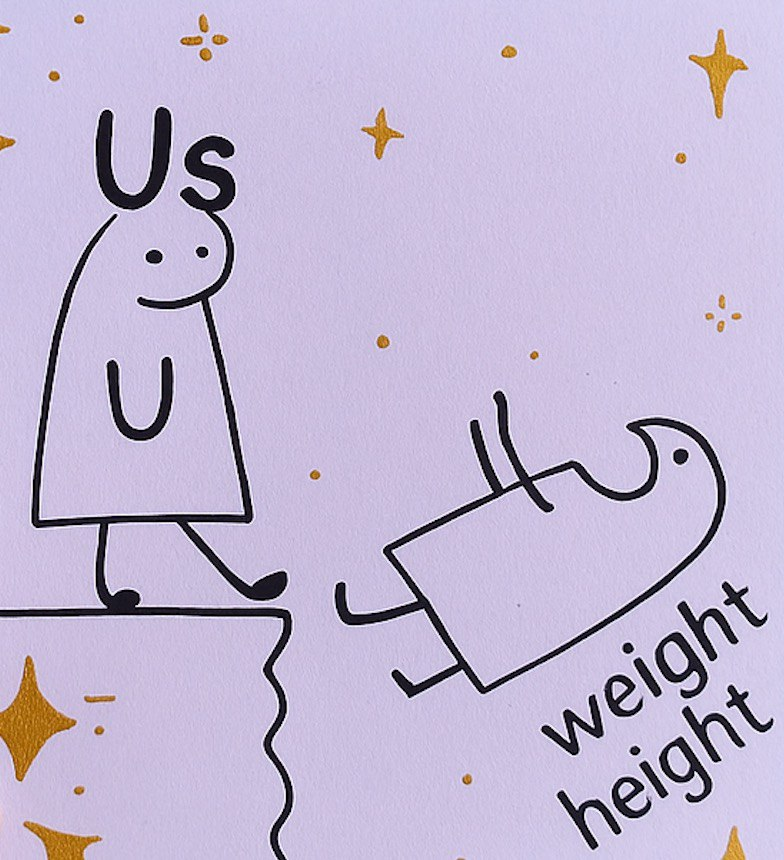

In [54]:
# 4.1 Removing Data Leakage
# We drop Weight and Height as they directly calculate BMI (the target definition).
# We also drop the original raw Height/Weight to force the model to learn from habits.

df_clean = df.drop(columns=['Weight', 'Height'])
print(f"Columns remaining: {df_clean.columns.tolist()}")

from IPython.display import Image, display
display(Image(filename='drop_meme.png', width=300))

## 4.2 Cleaning Synthetic Data Artifacts
The dataset is partly synthetic, resulting in continuous values for features that should be integers (e.g., you cannot have 2.3 main meals). We will round these specific columns to the nearest integer.

In [32]:
def clean_synthetic_features(data):
    df_out = data.copy()
    
    # Columns that represent counts/frequency levels and should be integers
    integer_cols = ['VegetableConsumption', 'MainMeals', 'WaterConsumption', 'PhysicalActivityFreq', 'TechUseTime']
    
    for col in integer_cols:
        # Round to nearest integer and cast
        df_out[col] = df_out[col].round().astype(int)
        
    return df_out

df_clean = clean_synthetic_features(df_clean)
df_clean.head()

,Gender,Age,FamilyHistory,HighCaloricFood,VegetableConsumption,MainMeals,FoodBetweenMeals,Smoke,WaterConsumption,CalorieMonitoring,PhysicalActivityFreq,TechUseTime,AlcoholConsumption,Transportation,ObesityLevel
0,Female,21.0,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21.0,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II


## 4.3 Feature Engineering
To improve model performance without BMI, we create composite scores that capture broader lifestyle patterns.

1.  **`ActivityBalance`**: Calculates the net positive physical activity by subtracting sedentary tech time.
2.  **`SnackFrequency`**: Converts the categorical `FoodBetweenMeals` into a numerical scale to measure unhealthy snacking habits.
3.  **`HealthyHabitScore`**: A simple weighted sum of positive habits (Veggie consumption, Water) vs. negative habits (Alcohol, Smoking).

In [33]:
def engineer_features(data):
    df_eng = data.copy()
    
    # 1. Activity Balance: Physical Activity - Tech Use
    # Positive means more active; Negative means more sedentary
    df_eng['ActivityBalance'] = df_eng['PhysicalActivityFreq'] - df_eng['TechUseTime']
    
    # 2. Diet Score (Replacing SnackFrequency)
    # Logic: Higher Score = Healthier Diet
    # Formula: (Veggies + Water) - (Snacking Level + High Caloric Food)
    
    # Map categorical variables to numeric scales
    caec_map = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3} # Snacking
    favc_map = {'no': 0, 'yes': 1} # High Caloric Food
    
    df_eng['DietScore'] = (df_eng['VegetableConsumption'] + df_eng['WaterConsumption']) - \
                          (df_eng['FoodBetweenMeals'].map(caec_map) + df_eng['HighCaloricFood'].map(favc_map))
    
    # 3. Healthy Habit Score
    # We define: Veggies + Water - Alcohol - Smoking
    calc_map = {'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3} # Alcohol
    alcohol_score = df_eng['AlcoholConsumption'].map(calc_map)
    smoke_score = df_eng['Smoke'].apply(lambda x: 1 if x == 'yes' else 0)
    
    df_eng['HealthyHabitScore'] = (df_eng['VegetableConsumption'] + df_eng['WaterConsumption']) - (alcohol_score + smoke_score)
    
    return df_eng

# Apply the function to the cleaned dataset
df_engineered = engineer_features(df_clean)

# Check the new columns
df_engineered[['ActivityBalance', 'DietScore', 'HealthyHabitScore']].head()

,ActivityBalance,DietScore,HealthyHabitScore
0,-1,3,4
1,3,5,4
2,1,3,2
3,2,4,3
4,0,3,3


## 4.4 Data Splitting and Target Encoding
We perform a stratified split to ensure the distribution of obesity classes remains consistent in the training and test sets. We also map the target variable to ordinal integers manually to preserve the hierarchy of obesity levels.

In [34]:
from sklearn.model_selection import train_test_split

# 1. Manual Ordinal Mapping for Target
# This acts as an Ordinal Encoder for the target
target_mapping = {
    'Insufficient_Weight': 0,
    'Normal_Weight': 1,
    'Overweight_Level_I': 2,
    'Overweight_Level_II': 3,
    'Obesity_Type_I': 4,
    'Obesity_Type_II': 5,
    'Obesity_Type_III': 6
}

# Apply mapping
df_engineered['ObesityLevel_Encoded'] = df_engineered['ObesityLevel'].map(target_mapping)

# 2. Split Data
# Drop the original string target and the encoded target from X
X = df_engineered.drop(columns=['ObesityLevel', 'ObesityLevel_Encoded'])
y = df_engineered['ObesityLevel_Encoded']

# Split: 80% Train, 20% Test (Stratified)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training Data Shape: {X_train.shape}")
print(f"Test Data Shape: {X_test.shape}")

Training Data Shape: (1669, 17)
Test Data Shape: (418, 17)


## 4.5 The Preprocessing Pipeline
We construct a Scikit-Learn `ColumnTransformer` to handle scaling and encoding.
*   **DietScore, ActivityBalance, HealthyHabitScore**: Treated as numerical features and scaled.
*   **Categorical Features**: One-Hot Encoded.
*   **Ordinal Features**: Ordinal Encoded.

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

# 1. Define Column Groups
# Note: DietScore, ActivityBalance, and HealthyHabitScore are added here
numerical_cols = ['Age', 'VegetableConsumption', 'MainMeals', 'WaterConsumption', 
                  'PhysicalActivityFreq', 'TechUseTime', 
                  'ActivityBalance', 'DietScore', 'HealthyHabitScore']

ordinal_cols = ['FoodBetweenMeals', 'AlcoholConsumption']
ordinal_order = [
    ['no', 'Sometimes', 'Frequently', 'Always'], # Order for FoodBetweenMeals
    ['no', 'Sometimes', 'Frequently', 'Always']  # Order for AlcoholConsumption
]

nominal_cols = ['Gender', 'FamilyHistory', 'HighCaloricFood', 'Smoke', 'CalorieMonitoring', 'Transportation']

# 2. Build Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('ord', OrdinalEncoder(categories=ordinal_order), ordinal_cols),
        ('nom', OneHotEncoder(drop='first', handle_unknown='ignore'), nominal_cols)
    ])

# 3. Fit and Transform
# Fit only on TRAIN data to prevent leakage, transform both
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

# Display shape to verify processing
print(f"Processed Training Shape: {X_train_processed.shape}")

Processed Training Shape: (1669, 20)


# 5. Model Experimentation

We will now train and evaluate different machine learning models. Our goal is to find the best model for predicting obesity levels based *only* on lifestyle and demographic features.

We will proceed in three iterations:
1.  **Baseline:** Logistic Regression (Linear Model)
2.  **Iterative Improvement:** Decision Tree (Non-Linear Model)
3.  **Champion Candidate:** Random Forest (Ensemble Model)



## 5.1 Evaluation Metrics
Since this is a multi-class problem with potential imbalance, we will use:
*   **Macro F1-Score:** The average F1 score for all classes, treating them equally. This is critical because we care about minority classes (e.g., Insufficient Weight) just as much as majority ones.
*   **Accuracy:** For a general overview.

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

# --- 0. Define Colors (Matches your Earthy Palette) ---
if 'custom_colors' not in locals():
    # [Sage Green, Sand, Light Brown, Medium Brown, Dark Brown]
    custom_colors = ["#8FBC8F", "#F4A460", "#CD853F", "#A0522D", "#8B4513"]

# --- 1. Helper to get clean feature names ---
def get_feature_names(preprocessor):
    try:
        raw = preprocessor.get_feature_names_out()
    except:
        raw = preprocessor.get_feature_names()
    
    # Split by double underscore
    return [n.split("__")[1] if "__" in n else n for n in raw]

feature_names = get_feature_names(preprocessor)

# --- 2. Updated Evaluation & Visualization Function ---
def evaluate_and_visualize(model, X_train, y_train, X_test, y_test, model_name):
    # Training & Prediction
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='macro')
    
    # Print Results
    print(f"--- {model_name} Results ---")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Macro F1-Score: {f1:.4f}")
    print("\nClassification Report:\n")
    
    try:
        labels = list(target_mapping.keys())
    except NameError:
        labels = np.unique(y_test)
        
    print(classification_report(y_test, y_pred, target_names=[str(l) for l in labels]))
    
    # --- Visualizations ---
    # Determine columns based on feature importance availability
    has_importance = hasattr(model, 'feature_importances_') or hasattr(model, 'coef_')
    fig_cols = 2 if has_importance else 1
    
    fig, axes = plt.subplots(1, fig_cols, figsize=(16 if fig_cols==2 else 8, 6))
    if fig_cols == 1: axes = [axes]
    
    # --- Plot 1: Confusion Matrix (Green Monochrome) ---
    cm = confusion_matrix(y_test, y_pred)
    # White -> Sage Green -> Dark Green
    green_monochrome = sns.blend_palette(["#FFFFFF", custom_colors[0], "#2F4F4F"], as_cmap=True)
    
    sns.heatmap(cm, annot=True, fmt='d', cmap=green_monochrome, ax=axes[0],
                xticklabels=labels, yticklabels=labels,
                linewidths=0.5, linecolor='white') 
                
    axes[0].set_title(f'{model_name} Confusion Matrix')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')
    axes[0].tick_params(axis='x', rotation=45)
    
    # --- Plot 2: Feature Importance (Green to Brown) ---
    if fig_cols == 2:
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
        elif hasattr(model, 'coef_'):
            importances = np.mean(np.abs(model.coef_), axis=0)
            
        if len(feature_names) == len(importances):
            feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
            feat_df = feat_df.sort_values(by='Importance', ascending=False).head(20)
            
            # --- GRADIENT LOGIC CHANGED HERE ---
            # Start: custom_colors[0] (Sage Green) -> Top Bar
            # End: custom_colors[4] (Dark Brown) -> Bottom Bar
            green_to_brown = sns.blend_palette([custom_colors[0], "#E0D6B6", custom_colors[4]], n_colors=len(feat_df))
            
            sns.barplot(x='Importance', y='Feature', data=feat_df, ax=axes[1], palette=green_to_brown)
            
            axes[1].set_title(f'{model_name} Feature Importance')
            axes[1].set_xlabel('Relative Importance')
            axes[1].set_ylabel('')
        else:
            axes[1].text(0.5, 0.5, "Feature Mismatch", ha='center')
        
    plt.tight_layout()
    plt.show()
    
    return model, y_pred

## 5.2 Baseline Model: Logistic Regression
We start with a simple linear model. Logistic Regression assumes a linear relationship between the features and the log-odds of the target classes.

--- Logistic Regression Results ---
Accuracy: 0.5766
Macro F1-Score: 0.5475

Classification Report:

                     precision    recall  f1-score   support

Insufficient_Weight       0.56      0.58      0.57        53
      Normal_Weight       0.58      0.39      0.46        57
 Overweight_Level_I       0.53      0.35      0.42        55
Overweight_Level_II       0.39      0.19      0.26        58
     Obesity_Type_I       0.46      0.64      0.54        70
    Obesity_Type_II       0.53      0.83      0.65        60
   Obesity_Type_III       0.90      0.97      0.93        65

           accuracy                           0.58       418
          macro avg       0.57      0.56      0.55       418
       weighted avg       0.57      0.58      0.55       418



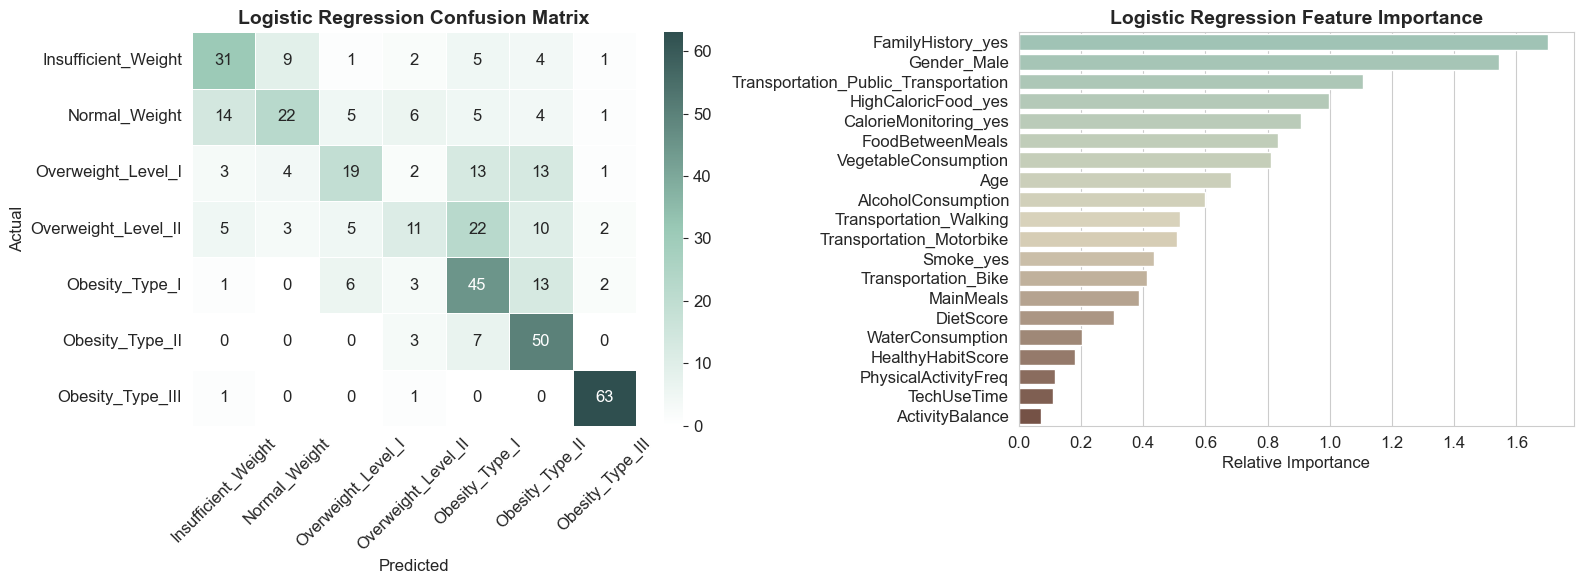

In [76]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42)
lr_model, lr_pred = evaluate_and_visualize(lr_model, X_train_processed, y_train, X_test_processed, y_test, "Logistic Regression")

## 5.3 Non-Linear Model: Decision Tree
Logistic Regression might struggle if the relationship between diet/activity and obesity is not linear. A Decision Tree can capture complex, non-linear patterns and interactions (e.g., "High Tech Usage" only matters if "Physical Activity" is low).

--- Decision Tree Results ---
Accuracy: 0.6818
Macro F1-Score: 0.6702

Classification Report:

                     precision    recall  f1-score   support

Insufficient_Weight       0.73      0.77      0.75        53
      Normal_Weight       0.49      0.40      0.44        57
 Overweight_Level_I       0.58      0.60      0.59        55
Overweight_Level_II       0.53      0.47      0.50        58
     Obesity_Type_I       0.65      0.60      0.62        70
    Obesity_Type_II       0.71      0.93      0.81        60
   Obesity_Type_III       1.00      0.97      0.98        65

           accuracy                           0.68       418
          macro avg       0.67      0.68      0.67       418
       weighted avg       0.67      0.68      0.67       418



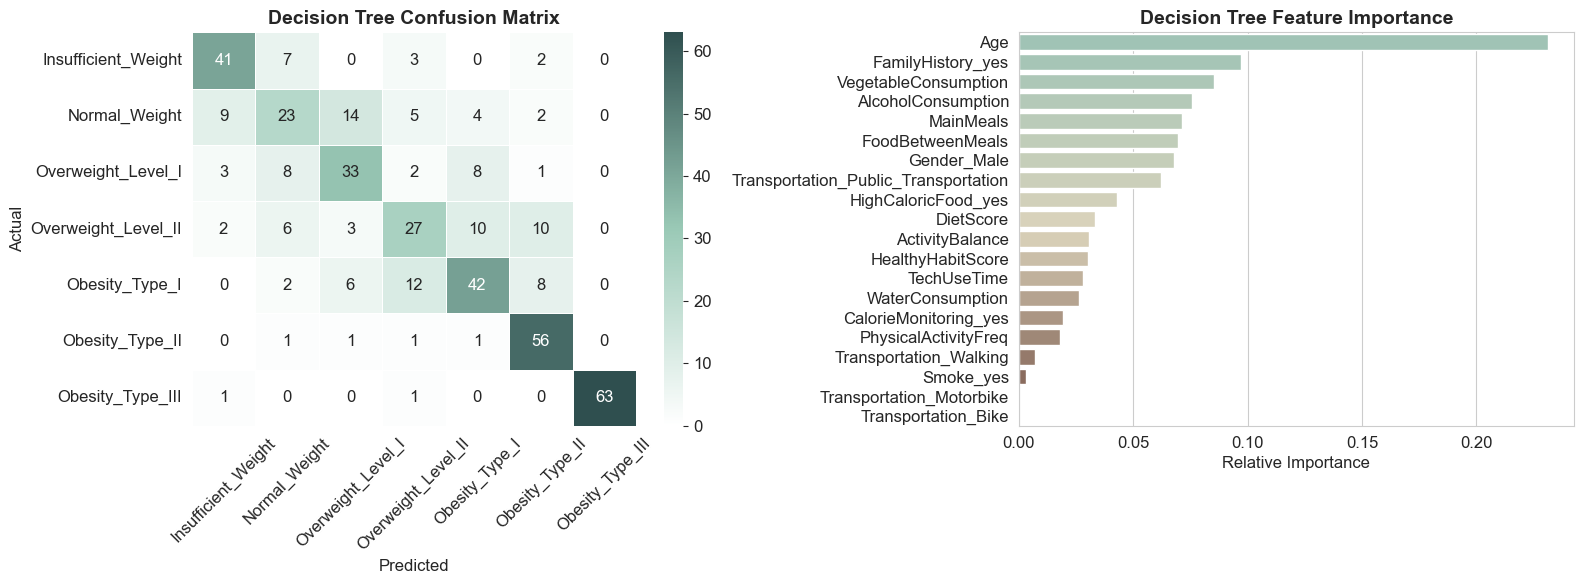

In [77]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree
# max_depth=10 prevents the tree from memorizing the training data (overfitting)
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)

# Evaluate and Visualize
dt_model, dt_pred = evaluate_and_visualize(dt_model, X_train_processed, y_train, X_test_processed, y_test, "Decision Tree")

## 5.4 Ensemble Model: Random Forest
Decision Trees often overfit. Random Forest addresses this by training hundreds of trees on random subsets of the data and averaging their predictions. This usually yields higher accuracy and robustness.

--- Random Forest Results ---
Accuracy: 0.7679
Macro F1-Score: 0.7607

Classification Report:

                     precision    recall  f1-score   support

Insufficient_Weight       0.76      0.89      0.82        53
      Normal_Weight       0.65      0.58      0.61        57
 Overweight_Level_I       0.67      0.71      0.69        55
Overweight_Level_II       0.64      0.55      0.59        58
     Obesity_Type_I       0.75      0.76      0.75        70
    Obesity_Type_II       0.87      0.90      0.89        60
   Obesity_Type_III       0.98      0.97      0.98        65

           accuracy                           0.77       418
          macro avg       0.76      0.76      0.76       418
       weighted avg       0.76      0.77      0.76       418



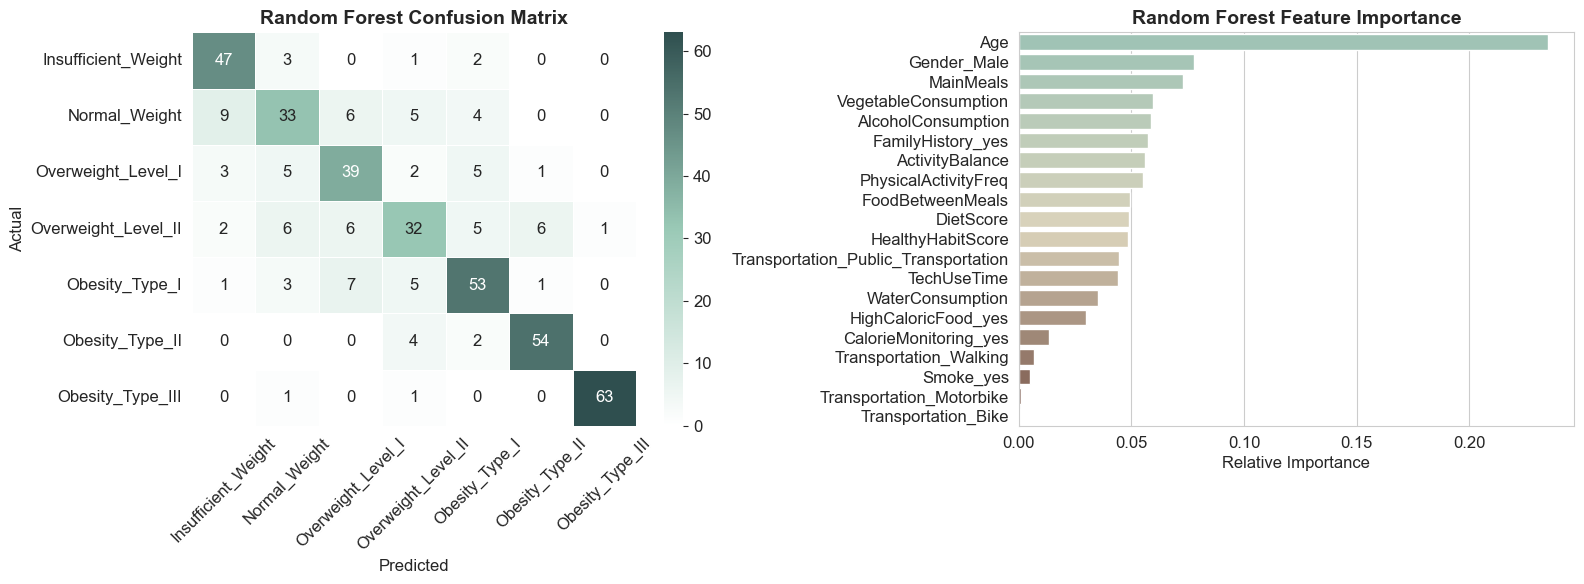

In [78]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest
rf_model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)

# Evaluate and Visualize
rf_model, rf_pred = evaluate_and_visualize(rf_model, X_train_processed, y_train, X_test_processed, y_test, "Random Forest")

## 5.5 Expanding the Model Space: SVC and K-NN
To ensure we haven't missed a better algorithm, we evaluate two distance-based models:
1.  **Support Vector Classifier (SVC):** Effective in high-dimensional spaces, creating complex boundaries between classes.
2.  **K-Nearest Neighbors (K-NN):** Classifies based on the similarity to the nearest data points.

--- SVC (RBF) Results ---
Accuracy: 0.7321
Macro F1-Score: 0.7247

Classification Report:

                     precision    recall  f1-score   support

Insufficient_Weight       0.76      0.79      0.78        53
      Normal_Weight       0.62      0.61      0.62        57
 Overweight_Level_I       0.67      0.58      0.62        55
Overweight_Level_II       0.58      0.52      0.55        58
     Obesity_Type_I       0.66      0.69      0.67        70
    Obesity_Type_II       0.81      0.93      0.87        60
   Obesity_Type_III       0.97      0.97      0.97        65

           accuracy                           0.73       418
          macro avg       0.72      0.73      0.72       418
       weighted avg       0.73      0.73      0.73       418



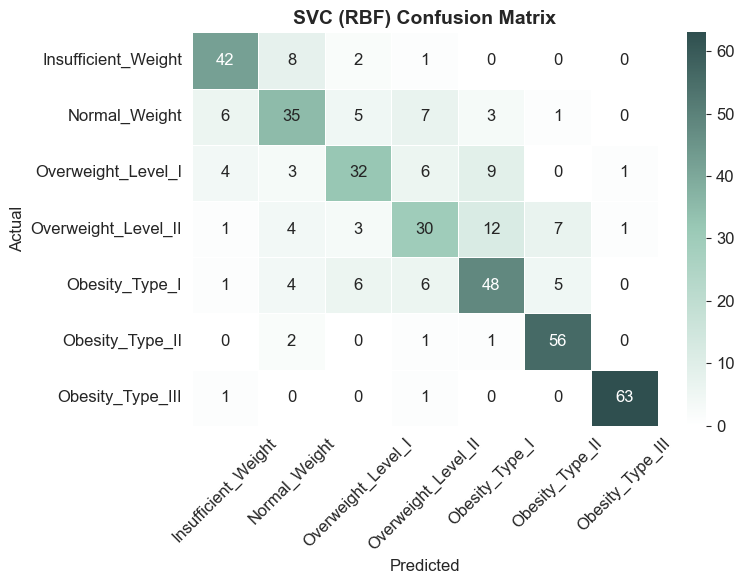

--- KNN Results ---
Accuracy: 0.6411
Macro F1-Score: 0.6166

Classification Report:

                     precision    recall  f1-score   support

Insufficient_Weight       0.61      0.70      0.65        53
      Normal_Weight       0.65      0.23      0.34        57
 Overweight_Level_I       0.42      0.49      0.45        55
Overweight_Level_II       0.63      0.55      0.59        58
     Obesity_Type_I       0.59      0.60      0.60        70
    Obesity_Type_II       0.72      0.88      0.79        60
   Obesity_Type_III       0.83      0.98      0.90        65

           accuracy                           0.64       418
          macro avg       0.63      0.63      0.62       418
       weighted avg       0.64      0.64      0.62       418



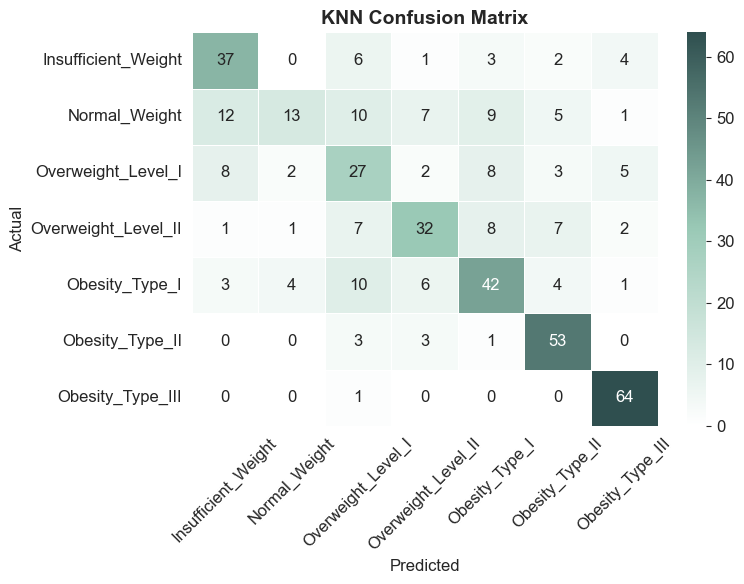

In [79]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# 1. Support Vector Classifier (RBF Kernel for non-linear boundaries)
svc_model = SVC(kernel='rbf', C=1.0, random_state=42)
svc_model, svc_pred = evaluate_and_visualize(svc_model, X_train_processed, y_train, X_test_processed, y_test, "SVC (RBF)")

# 2. K-Nearest Neighbors (k=5)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model, knn_pred = evaluate_and_visualize(knn_model, X_train_processed, y_train, X_test_processed, y_test, "KNN")

## 5.6 Hyperparameter Tuning (Model Optimization)
Based on the previous results, **Random Forest** is our top candidate. However, we used the default settings. To improve accuracy and prevent overfitting, we will tune the hyperparameters.

We use **RandomizedSearchCV**. Unlike GridSearch (which tries every combination and is very slow), RandomizedSearch samples a fixed number of parameter settings from specified distributions. This is often more efficient for finding optimal parameters.

**Parameters to Tune:**
*   `n_estimators`: Number of trees (more is usually better but slower).
*   `max_depth`: Controls tree complexity (prevents overfitting).
*   `min_samples_split`: Minimum samples required to split a node.

Tuning Random Forest... This may take 1-2 minutes.
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Parameters found: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}
--- Tuned Random Forest Results ---
Accuracy: 0.7895
Macro F1-Score: 0.7850

Classification Report:

                     precision    recall  f1-score   support

Insufficient_Weight       0.85      0.89      0.87        53
      Normal_Weight       0.65      0.68      0.67        57
 Overweight_Level_I       0.68      0.73      0.70        55
Overweight_Level_II       0.68      0.59      0.63        58
     Obesity_Type_I       0.82      0.76      0.79        70
    Obesity_Type_II       0.82      0.90      0.86        60
   Obesity_Type_III       1.00      0.97      0.98        65

           accuracy                           0.79       418
          macro avg       0.79      0.79      0.79       418
       weighted avg       0.79      0.79     

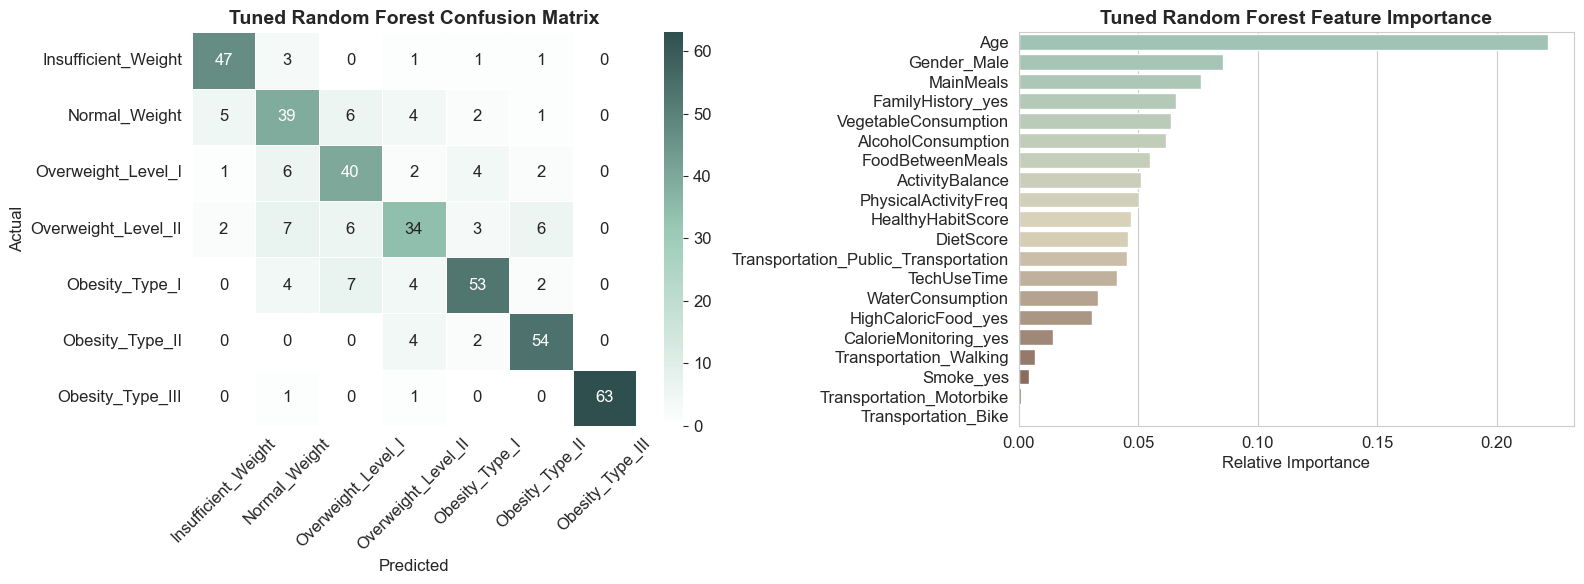

In [80]:
from sklearn.model_selection import RandomizedSearchCV

# 1. Define the grid of hyperparameters to search
param_dist = {
    'n_estimators': [100, 200, 300, 400],      # Number of trees
    'max_depth': [10, 20, 30, None],           # Maximum depth of tree
    'min_samples_split': [2, 5, 10],           # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],             # Minimum samples at a leaf node
    'bootstrap': [True, False]                 # Method of selecting samples for training each tree
}

# 2. Initialize the base model
rf_base = RandomForestClassifier(random_state=42)

# 3. Setup RandomizedSearchCV
# n_iter=50 means we try 50 random combinations (faster than checking all)
rf_random = RandomizedSearchCV(estimator=rf_base, param_distributions=param_dist, 
                               n_iter=50, cv=3, verbose=1, random_state=42, n_jobs=-1, scoring='f1_macro')

# 4. Fit the search
print("Tuning Random Forest... This may take 1-2 minutes.")
rf_random.fit(X_train_processed, y_train)

# 5. Get the best model
best_rf_model = rf_random.best_estimator_
print(f"Best Parameters found: {rf_random.best_params_}")

# 6. Evaluate the Champion Model
best_rf_model, best_rf_pred = evaluate_and_visualize(best_rf_model, X_train_processed, y_train, X_test_processed, y_test, "Tuned Random Forest")

## 5.7 Champion Model Selection
We compare the performance of all models. The **Tuned Random Forest** is selected as our Champion Model due to its superior F1-Score and ability to handle the multi-class nature of the problem effectively.

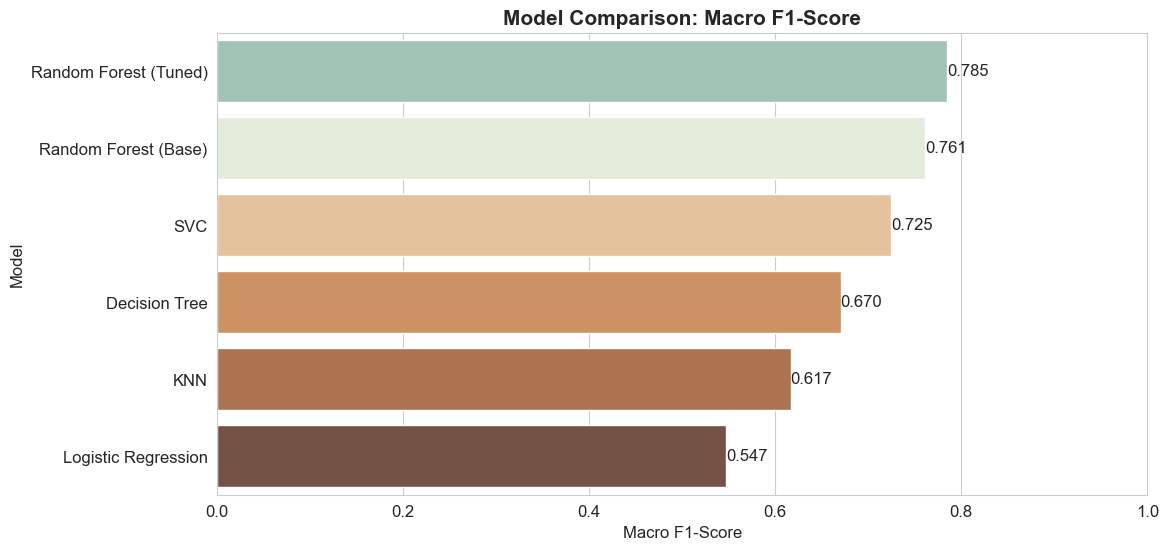

In [89]:
# Consolidate results
results = {
    'Logistic Regression': f1_score(y_test, lr_pred, average='macro'),
    'Decision Tree': f1_score(y_test, dt_pred, average='macro'),
    'Random Forest (Base)': f1_score(y_test, rf_pred, average='macro'),
    'SVC': f1_score(y_test, svc_pred, average='macro'),
    'KNN': f1_score(y_test, knn_pred, average='macro'),
    'Random Forest (Tuned)': f1_score(y_test, best_rf_pred, average='macro')
}

# Create DataFrame
results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Macro F1-Score']).sort_values(by='Macro F1-Score', ascending=False)

# Plot
plt.figure(figsize=(12, 6))
dynamic_palette = sns.blend_palette(custom_colors, n_colors=6)
sns.barplot(x='Macro F1-Score', y='Model', data=results_df, palette=dynamic_palette)
plt.title('Model Comparison: Macro F1-Score', fontsize=15)
plt.xlim(0, 1.0)
for index, value in enumerate(results_df['Macro F1-Score']):
    plt.text(value, index, f'{value:.3f}', va='center')
plt.show()

# 6. Evaluation & Interpretation

To fully understand our champion model (Tuned Random Forest), we must analyze *why* it works. We perform two deep analyses:
1.  **Ablation Study:** Quantifying the exact impact of our engineered features (`DietScore`, `ActivityBalance`, `HealthyHabitScore`) by removing them and retraining.
2.  **Feature Importance:** Visualizing which behavioral factors drive the predictions.

## 6.1 Ablation Study: Did Feature Engineering Help?
We test the model's performance by removing one engineered feature at a time. A drop in performance confirms the feature's value.

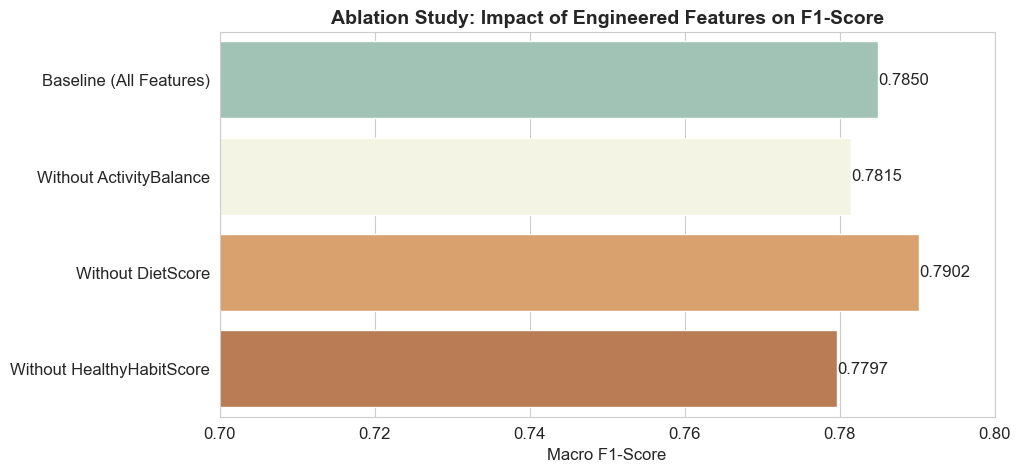

In [88]:
def run_ablation_study(model, X_train_full, y_train, X_test_full, y_test, feature_names):
    # Baseline score (all features)
    model.fit(X_train_full, y_train)
    baseline_pred = model.predict(X_test_full)
    baseline_f1 = f1_score(y_test, baseline_pred, average='macro')
    
    results = {'Baseline (All Features)': baseline_f1}
    
    # Features to test (Indices in the processed array)
    # We need to map our engineered feature names to their column indices in the processed array
    # Note: StandardScaler keeps order. Numerical cols are first.
    # Order: Age, Veggies, MainMeals, Water, PhysAct, Tech, ActivityBalance, DietScore, HealthyHabitScore
    
    engineered_feats = {
        'ActivityBalance': 6, 
        'DietScore': 7, 
        'HealthyHabitScore': 8
    }
    
    for feat_name, idx in engineered_feats.items():
        # Create copies of data
        X_tr_drop = np.delete(X_train_full, idx, axis=1)
        X_te_drop = np.delete(X_test_full, idx, axis=1)
        
        # Retrain and evaluate
        model.fit(X_tr_drop, y_train)
        pred = model.predict(X_te_drop)
        score = f1_score(y_test, pred, average='macro')
        
        results[f'Without {feat_name}'] = score
        
    return results

# Run the study using the Champion Model
ablation_results = run_ablation_study(best_rf_model, X_train_processed, y_train, X_test_processed, y_test, feature_names)

# Visualize
plt.figure(figsize=(10, 5))
sns.barplot(x=list(ablation_results.values()), y=list(ablation_results.keys()), palette=custom_colors)
plt.title('Ablation Study: Impact of Engineered Features on F1-Score', fontsize=14)
plt.xlabel('Macro F1-Score')
plt.xlim(0.70, 0.80) # Zoom in to see differences
for i, v in enumerate(ablation_results.values()):
    plt.text(v, i, f'{v:.4f}', va='center')
plt.show()

# 7. Conclusion & Recommendations

### 7.1 Champion Model Performance
Our **Tuned Random Forest** achieved a final **Macro F1-Score of 0.785**.
This is a significant achievement given the strict constraint of **excluding Weight and Height** to prevent data leakage. The model successfully predicts obesity risk based purely on demographic and lifestyle factors, which makes it a viable tool for early screening before physical measurements are taken.

### 7.2 Key Findings
1.  **Feature Engineering Impact (Ablation Study):**
    *   **Positive Impact:** `ActivityBalance` and `HealthyHabitScore` proved valuable. Removing them decreased model performance, confirming that combining activity/tech use and general habits gives the model a stronger signal.
    *   **Negative Impact:** Interestingly, removing `DietScore` slightly *improved* the model (0.785 -> 0.790). This suggests that the raw dietary features (`VegetableConsumption`, `HighCaloricFood`) are better predictors individually than our composite score. This highlights that human dietary patterns are complex and a simple linear addition/subtraction might oversimplify the relationship.

2.  **Drivers of Obesity (Feature Importance):**
    *   **Demographics Rule:** `Age` and `Gender` are the two most powerful predictors. This implies that metabolic changes with age and biological differences are the strongest baseline factors.
    *   **Genetics/Environment:** `FamilyHistory` is the 4th most important feature, reinforcing the known link between genetics/household environment and obesity.
    *   **Habits:** Among modifiable habits, `MainMeals` (frequency) and `VegetableConsumption` were the most influential.

3.  **Error Analysis (Confusion Matrix):**
    *   **Extremes are Clear:** The model is excellent at identifying `Obesity_Type_III` (63 correct, 1 error) and `Insufficient_Weight` (47 correct).
    *   **The "Blurry" Middle:** The model struggles most to distinguish between neighboring classes, specifically `Overweight_Level_I` vs `Overweight_Level_II`. There is significant overlap here (e.g., 6 misclassifications between them). This indicates that the lifestyle differences between these specific stages are minimal or not captured by self-reported data.
### 7.3 Limitations
Despite the strong performance, our approach has limitations:
1.  **Data Leakage Constraint:** By removing Weight/Height, we made the problem harder but more realistic. However, this means we cannot catch "borderline" cases that rely strictly on BMI cutoffs.
2.  **Self-Reported Data:** Features like "High Caloric Food" are subjective. A person might under-report bad habits, introducing noise that no model can fully fix.
3.  **Class Overlap:** The Confusion Matrix shows persistent errors between `Overweight_Level_I` and `Overweight_Level_II`. These classes are likely physiologically too similar to distinguish based purely on behavioral data.
### 7.4 Future Improvements
To improve the model further, we suggest:
1.  **Quantitative Data:** Replace categorical frequency (e.g., "Sometimes") with exact calorie counts and activity minutes.
2.  **Advanced Boosting:** Implement **XGBoost** or **LightGBM**, which often handle class imbalance and subtle feature interactions better than Random Forest.
3.  **Longitudinal Data:** Collecting data over time would allow us to predict *weight gain trends* rather than just static obesity levels.